# [Project 1] 자연어 처리를 통한 감정 분류

---

## 프로젝트 목표
- 자연어 데이터를 딥러닝 모델에 적용할 수 있게 전처리하는 과정을 학습
- 자연어 처리를 위한 대표적인 딥러닝 모델인 RNN 계열 모델과 Transformer 모델을 학습

---

## 프로젝트 목차
1. **데이터 확인하기**: 프로젝트에 사용할 데이터셋 확인

2. **자연어 데이터 전처리**: 자연어 데이터를 전처리하기 위한 Tokeznier 적용

3. **모델 학습을 위한 데이터셋 구성**: Embedding 개념 확인 및 학습, 검증, 테스트 데이터셋 구성

4. **RNN 계열 모델 학습**: 초기 자연어 처리 모델로 많이 쓰인 RNN 계열 모델 학습

5. **Transformer 모델 학습**: 최신 자연어 처리 모델의 기반인 Transformer 모델 학습

---

## 데이터 출처

https://www.kaggle.com/praveengovi/emotions-dataset-for-nlp


### Acknowledgements

Thanks to Elvis - https://lnkd.in/eXJ8QVB & Hugging face team

The technique to prepare the dataset - https://www.aclweb.org/anthology/D18-1404/

---

## 프로젝트 개요

사람의 감정을 기계가 이해할 수 있을까요? 이는 인공지능의 태동기부터 꾸준히 사람들의 관심사였습니다. 1966년에 MIT에서 일라이자(ELIZA) 라는, 현대의 개념에 비추어 보면 챗봇 같은 인공지능을 만들었었는데, 본래 상담 치료용으로 만든 것인 만큼 당대 기준으로는 사람과 대화하는 듯한 느낌을 주는 인공지능이었습니다. 그런데 지금 기준으로 보면 허술하기 짝이 없던 이 인공지능에 사람들은 **기계에 감정이 담긴 것처럼 착각**하게 되었고 이 현상은 [**일라이자 효과(ELIZA Effect)**](https://en.wikipedia.org/wiki/ELIZA_effect) 라는 이름까지 붙게 되었습니다.


**[ELIZA 대화 화면]**
<center><img src="img/ELIZA.png" width=500></center>

하지만 2020년대 기준으로 아직 인공지능은 사람의 감정을 이해하고 모방하는 수준에는 미친다고 보기는 힘든 상황입니다. 사실 "기계가 감정을 이해한다는 건 무슨 의미인가?"라는 질문에는 철학적인 측면도 함께 들어가 있어서 복잡미묘한 주제이긴 하지만, 현재 사람의 말(자연어)을 처리하기 위한 인공지능은 무수히 많은 텍스트 데이터를 학습하고 거기서 찾은 패턴으로 새로운 문장을 생성하던가 하는 것입니다. 다만 이 규모가 어마어마하다 보니 모델이 직접 생각해서 문장을 쓰는 것처럼 보이는 것 뿐입니다.

그래도 딥러닝 모델의 발전으로 2010년대 후반에 비약적인 발전을 이룬 자연어 처리 분야(Natural Language Processing, NLP)는 다양한 분야에서 활용하고 있습니다. 어떤 상품이나 영화 등의 리뷰 문장이 긍정적인지 부정적인지 판단하는 감성 분석(Sentimental Analysis), 음성 인식, 챗봇, 번역 등이 대표적인 응용 분야라고 할 수 있습니다.

이번 프로젝트에서는 2010년대 중후반과 2020년대에 자연어 처리 모델로 유명했고, 유명한 두가지 모델을 통해 컴퓨터로 자연어를 처리하고 딥러닝 모델을 학습하는 대표적인 과정을 알아보겠습니다. 구체적으로 자연어 문장의 감성을 분류해놓은 데이터셋을 통해 문장의 감성을 분석하는 작업을 수행하겠습니다.

---

## 1. 데이터 확인하기

In [1]:
# 프로젝트에서 사용할 라이브러리들을 불러옵니다.
!pip install -U numpy==1.20.0
!pip install -U tensorflow==2.10.0

import os
# Tensorflow 관련 디버그 및 경고 메시지 비활성화
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '2'

import nltk
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 랜덤 시드를 고정합니다.
SEED = 2022
tf.keras.utils.set_random_seed(SEED)
tf.config.experimental.enable_op_determinism()

본 프로젝트에서 사용할 데이터는 `data` 디렉토리에 `train.txt`, `val.txt`, `test.txt`로 존재합니다.

텍스트 파일인 만큼 각 파일을 직접 열어보면 아래와 같은 구조를 가지고 있습니다.

<center><img src="img/data_example.png"></center>

각 행에는 하나의 문장과 해당하는 감성 라벨이 존재합니다. 그리고 이 둘 사이는 세미 콜론(;)을 통해 구분되어 있습니다. 따라서 구분자만 세미콜론으로 지정하면 txt 파일이어도 pandas의 `read_csv`를 통해 불러올 수 있습니다.

In [2]:
# 본래 CSV 파일이 아닌 만큼 데이터 파일에는 각 열의 이름이 없습니다.
# 따라서 각 열의 이름을 직접 정해줍니다.
column_name = ['sentence', 'emotion']

train_df = pd.read_csv(
    "./data/train.txt",
    header=None,
    sep=';',
    names=column_name,
    encoding='utf-8'
)
valid_df = pd.read_csv(
    "./data/val.txt",
    header=None,
    sep=';',
    names=column_name,
    encoding='utf-8'
)
test_df = pd.read_csv(
    "./data/test.txt",
    header=None,
    sep=';',
    names=column_name,
    encoding='utf-8'
)

train_df

,sentence,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


다음으로 우리가 분류해야 할 감성의 종류가 몇가지인지 알아보겠습니다.

In [3]:
train_df['emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

데이터셋에는 총 6가지의 감정이 들어있는 것으로 확인됩니다.

## 2. 자연어 데이터 전처리

자연어 데이터는 사람의 언어를 문자로 적은 것들이라 딥러닝 모델을 비롯한 기계학습 모델에 적용할 수 있는 형태와는 거리가 있습니다.

따라서 자연어 데이터를 기계학습 모델에 적용하기 위해 보편적으로 아래와 같은 과정을 거칩니다.

1. 문장 내에서 특수 문자나 공백 문자 등 의미를 가지지 않는 문자 제거 (**정제, Cleaning**)

2. 문장을 단어 혹은 최소한의 의미를 가지는 토큰(token) 단위로 분리 (**토큰화, Tokenization**)
    - 토큰화 알고리즘에 따라서 토큰화된 결과가 달라질 수 있습니다.

3. 분리된 단어(토큰)에서 같은 의미의 다른 표현을 통일
    - 단어의 원형을 뽑아내는 어간(Stem) 추출 (**Stemming**)
    - 동사의 기본형 같은 표제어로 통일하는 표제어 추출 (**Lemmatization**)

4. 영어의 관사(a, an, the)와 같은 문법적으로는 중요하지만 큰 의미를 가지지는 않는 불용어(**Stopword**) 제거

5. 토큰화된 단어들을 벡터 형태로 임베딩(**Embedding**)
    - 이 과정에서도 다양한 알고리즘을 사용할 수 있습니다.

이들 과정을 엄격하게 모두 지켜야 하는 것은 아니고, 데이터에 따라서 일부만 적용해도 모델 성능이 잘 나온다면 생략할 수 있습니다. 대신 이 때도 토큰화와 임베딩 과정은 반드시 거쳐야 할 것입니다.

하지만 최근에는 토큰화를 수행해주는 Tokenizer 알고리즘이 지속적으로 정교해지면서 최신 자연어 처리 딥러닝 모델들의 Tokenizer는 이들 과정을 사실상 한번에 수행해주기도 합니다.

**[임베딩 모델로 큰 인기를 끌었던 Word2Vec]**
<center><img src="img/word2vec.png" width=500></center>

그래서 여기서는 토큰화와 임베딩을 좀더 자세히 알아보면서 Tensorflow로 사용하는 방법을 함께 다루겠습니다.

### 2.1. 토큰화 (Tokenization)

현대의 자연어 처리 모델들은 대부분 토큰화와 임베딩 과정을 거친 데이터를 통해 학습되는 구조입니다. 추후 새로운 패러다임이 나올지는 모르지만 일단 2020년대 기준으로는 그렇습니다.

먼저 토큰화를 수행하는 Tokenizer는 앞서 소개했듯 문장의 의미를 결정하는 최소한의 단위로 문장을 자르는 과정을 의미합니다. 이 과정에서 어떤 기준에 따라 자르는지에 따라 Tokenizer의 성격이 결정된다고 할 수 있습니다.

대부분 Tokenizer는 문장을 토큰으로 잘랐으면 각 토큰에 고유한 정수 인덱스를 부여합니다. 이때 토큰이 다를 경우에만 서로 다른 정수를 부여합니다. 이 정수 인덱스는 이후 임베딩 과정에서 활용하게 됩니다.

<center><img src="img/tokenization.png" width=700></center>

토큰화를 수행했으면 이제 각 문장을 정수 인덱스의 리스트로 표현할 수 있습니다. 가령 위 그림에서 첫번째 문장은 아래와 같이 표현될 것입니다.

```python
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
```

`a`, `it`, `was`와 같은 불용어(stopword)도 그대로 살아있고 뒤쪽 토큰들을 보면 중복도 걸러내지는 않은 걸로 보이지만 개념적으로 이렇다는 것만 이해하시면 충분합니다.

그러면 Tensorflow의 Tokenizer를 본 프로젝트의 데이터에 간단히 적용해보겠습니다.

In [4]:
# Tensorflow의 Tokenizer는 문자열의 리스트 형태를 입력으로 기대합니다.
train_texts = train_df['sentence'].tolist()

# Tokenizer layer를 생성합니다.
# 각 문장별로 생성되는 리스트의 최대 길이를 50으로 고정합니다.
tokenizer_layer = tf.keras.layers.TextVectorization(
    output_sequence_length=50
)

# Tokenizer를 모든 학습 데이터 문장에 적용합니다.
# 이 과정에서 학습 데이터에 포함된 모든 token들과 그에 따른 정수 인덱스를 생성합니다.
tokenizer_layer.adapt(train_texts)

tokenizer_model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,), dtype=tf.string),
    tokenizer_layer,
])

# 학습 데이터의 각 문장에 토큰화를 수행합니다.
train_texts_seq = tokenizer_model.predict(train_texts)

# Tokenizer가 인식한 전체 토큰 개수를 가져옵니다.
num_vocab = tokenizer_layer.vocabulary_size()

print(f"전체 토큰 개수: {num_vocab}개")
print(
    f"토큰화 이전: {train_texts[0]}\n"
    f"토큰화 이후: {train_texts_seq[0]}"
)

500/500 [==============================] - 0s 747us/step
전체 토큰 개수: 15214개
토큰화 이전: i didnt feel humiliated
토큰화 이후: [  2 140   3 686   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


`TextVectorization` layer가 Tensorflow에서 토큰화를 위해 사용하는 layer입니다. (기존에 Tensorflow에 [`Tokeinzer`](https://www.tensorflow.org/versions/r2.9/api_docs/python/tf/keras/preprocessing/text/Tokenizer)라는 클래스가 있었지만 Tensorflow 2.9 버전을 기점으로 Deprecated 되었으므로 `TextVectorization`을 소개합니다.)

해당 layer를 만들 때 문장별로 생성되는 리스트의 최대 길이를 50으로 제한했으므로 첫번째 문장의 경우 4개의 토큰 이외에는 모두 0으로 처리된 것을 확인할 수 있습니다. `TextVectorization`에서 인덱스 0은 무시해야 하는 부분, 즉 마스킹(Masking) 처리된 부분을 의미합니다.

토큰화를 수행했으면 서로 다른 토큰의 개수를 확인하는 것도 가능합니다. 이는 `vocabulary_size()`라는 메소드가 수행하고 있습니다. 여기서 중요한 용어가 하나 등장하는데, Tokenizer에서는 자신이 인식한 모든 토큰을 **vocabulary** 라고 부릅니다.

이 `TextVectorization`을 통해 토큰화된 결과는 사실 정교한 알고리즘을 통해 나온 것은 아닙니다. 다만 그런 정교한 토큰화 알고리즘이 필요하지 않지만 토큰화 과정 자체가 필요할 때를 위해 Tensorflow에서 지원하는 기능이라고 할 수 있습니다. 그리고 본 프로젝트처럼 간단한 작업을 위해서는 이 기본으로 지원하는 Tokeinzer 기능으로도 충분합니다.

그럼 알려진 유명한 Tokenizer에는 무엇이 있는지 간단히 소개하면, 최근 딥러닝 모델에 많이 사용되고 있는 [Byte-Pair Encoding(BPE)](https://arxiv.org/abs/1508.07909), [WordPiece](https://arxiv.org/abs/1609.08144v2)와 같은 것들이 있습니다. 이들은 단순히 단어 단위로 토큰을 만드는 것이 아닌 **더 작은 단위(subword)** 로 잘라서 토큰화를 수행한다는 특징이 있습니다. 그리고 임베딩 단원에서도 언급하겠지만, 이런 Tokenizer들은 해당 모델이 사용하는 임베딩 방식과 결합해서 BERT Tokenizer와 같이 "모델 이름 + Tokeznier"와 같이 불리기도 합니다.

**[Subword 토큰화 예시]**

<center><img src="img/subword-units.svg"></center>

여담으로 `TextVectorization` 또한 일종의 layer이기 때문에 Tensorflow의 Keras 모델 API를 통해 학습하고 적용해야 합니다. 이는 추후 다른 layer와 함께 모델을 구성하기 편리하게 만들어줍니다.

### 2.2 임베딩 (Embedding)

앞서 토큰화를 수행했으면 다음으로 임베딩 과정을 거치게 됩니다.

그런데 딥러닝 모델에 적용하기 위해 문자열 데이터를 숫자로 바꾼다고 했는데, 이미 토큰화를 통해 숫자로 바뀐 것을 왜 한 번 더 어떤 **작업**을 거치는 걸까요?

임베딩을 적용하는 이유는 조금 어렵게 표현하면 **토큰화를 적용한 결과 벡터(Vector)가 Sparse Representation**이기 때문입니다.

쉽게 말하면 앞서 확인해봤듯 리스트 안에 무의미한 정수 인덱스, 즉 0에 해당하는 인덱스가 꽤 많이 존재하기 때문입니다. 길이가 50 이상인 문장은 이 0이 없겠지만, 과연 이 정도 길이를 가지는 문장이 얼마나 되는지 먼저 확인해보겠습니다.

0이 아닌 인덱스의 길이가 50인 문장의 비율: 1.519%


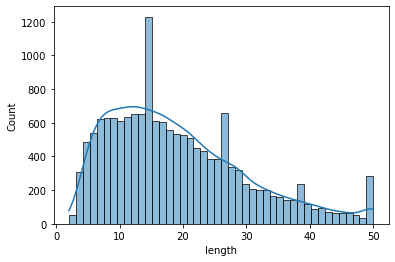

In [5]:
counter_list = []
for text_seq in train_texts_seq:
    counter_list.append(tf.math.count_nonzero(text_seq).numpy())

counter_df = pd.DataFrame(counter_list, columns=['length'])
sns.histplot(data=counter_df, x='length', kde=True)

print(
    f"0이 아닌 인덱스의 길이가 50인 문장의 비율: "
    f"{(len(counter_df[counter_df['length'] == 50]) / len(counter_df)) * 100:.3f}%"
)

그래프만 확인해보아도 0이 아닌 인덱스의 길이가 50인 비중은 매우 적어 보이고, 실제로도 1.5%에 불과합니다.

즉 98.5% 가량의 문장은 토큰화를 거쳤을 때 의미있는 토큰의 개수가 50개에 미치지 못하는 것입니다.

이 말은 달리하면 토큰화된 문장 벡터를 하나의 row로 하는 행렬을 만들었을 때 많은 행렬 원소의 값이 0이라는 의미입니다. 이러한 행렬을 **Sparse Matrix**라고 부릅니다.

<center><img src="img/sparse_vs_dense.png"></center>

그럼 sparse한 representation은 머신러닝에서 왜 사용하지 않는 것이 좋을까요? 이유는 0으로 표시된 정보는 무의미한 정보인데, 벡터의 차원만 늘리는 역할을 하고 있기 때문입니다. 즉 **차원의 저주** 문제 때문이라고 요약할 수 있습니다.

그래서 이런 sparse한 벡터를 dense하게, 즉 모든 차원이 유의미한 정보를 담도록 바꿔주기 위해서 임베딩을 적용한다고 할 수 있습니다.

임베딩에는 다양한 방법론이 존재합니다. 가장 단순한 방법에는 One-hot Encoding이 있는데, 이는 전체 vocabulary 개수만큼의 길이를 가지는 벡터를 준비하고 모두 0으로 채운 다음에, 각 토큰의 인덱스에 해당하는 위치에만 1로 지정하는 방식입니다. 이렇게 하면 무수히 많은 0들이 등장하고, 벡터 길이 또한 vocabulary 크기만큼 필요하므로 임베딩의 개념을 설명하는 것 말고는 현실적으로 쓰이는 경우는 없다고 봐도 무방합니다.

<center><img src="img/one_hot_encoding.png" width=500></center>

One-hot Encoding보다는 훨씬 정교하지만 현재 기준으로는 다소 전통적이라고 할 수 있는 방식은 Stanford 대학에서 발표한 [**Word2Vec**](https://arxiv.org/abs/1301.3781)과 이것의 발전형인 [**Glove**](https://nlp.stanford.edu/projects/glove/)가 있으며, Facebook(현 Meta)에서 발표한 [**FastText**](https://fasttext.cc/)가 있습니다.

이들 임베딩 방식은 기존에 단어 단위의 단순한 Tokenizer와 결합되어 많이 사용되었습니다. 하지만 최근 발표된 딥러닝 모델에서는 앞서 언급한 Subword Tokenizer와 모델 자체의 임베딩 방식을 결합하여 많이 사용되는 추세입니다. 아래 그림은 WordPiece Tokenizer와 자체 임베딩 방식을 사용하는 BERT 모델의 임베딩 과정 예시입니다.

<center><img src="img/bert_embedding.png" width=700></center>

하지만 역시 이 프로젝트에서는 이런 거창한 임베딩 방식까지는 필요가 없을 것 같습니다. (실제로 이를 사용하기 위해 라이브러리 불러오는 것도 간단하지는 않습니다)

그래서 Tensorflow에서는 간단하게 Sparse 벡터를 Dense한 벡터로 만들어주는 `Embedding` layer를 지원하고 있습니다. 이 Layer는 일종의 표(Table) 같은 역할을 하는 것으로 각 토큰의 인덱스를 지정한 차원의 벡터로 바꿔주는 작업을 수행합니다.

<center><img src="img/embedding_tf.png" width=500></center>

조금 더 구체적으로 설명하면 다음과 같습니다.
1. Tokenizer가 찾은 모든 vocabulary의 인덱스를 one-hot 인코딩 합니다
    - 앞서 전체 토큰 개수 길이를 가지는 0으로만 이루어진 벡터를 만든 다음에, 토큰 인덱스에 해당하는 위치에만 1을 적용합니다.
    - 즉 인덱스 5는 `[0, 0, 0, 0, 0, 1, 0, 0, ..., 0]` 으로 변합니다.

2. 이 one-hot 인코딩된 벡터를 지정한 차원으로 변환하기 위해 가중치 행렬(weight matrix)에 곱합니다.
    - $ v_{\text{embed}} = W \cdot v_{\text{one hot}}$

중요한 점은 각 문장에 토큰화를 수행해서 나온 각 문장의 벡터가 `Embedding` layer에 적용되는 것이 **아니라는** 것입니다. 우리가 원하는 것은 각 토큰들을 새로운 벡터 공간에 심어 넣는(embed) 것이기 때문입니다.

또 하나 주목할 만한 점은 `Embedding` layer에 **가중치 행렬**이 들어간다는 점입니다. 즉 이 layer는 다른 layer들처럼 **학습이 가능합니다!** 따라서 나중에 전체 모델을 만들어 학습시키면 각 토큰에 가장 적절한 임베딩 벡터를 생성할 수 있도록 가중치 행렬이 바뀌게 됩니다.

In [6]:
# 임베딩 layer를 생성합니다. 입력 차원은 전체 토큰 개수를, 출력 차원은 원하는 벡터 차원을 지정하면 됩니다.
embedding_layer = tf.keras.layers.Embedding(
    input_dim=num_vocab,
    output_dim=64,
)

# 이 또한 layer이기 때문에 모델로 구성해주어야 합니다.
# 입력값은 각 문장의 길이가 50이므로 50을 지정합니다.
embedding_model = tf.keras.Sequential([
    tf.keras.Input(shape=(50,)),
    embedding_layer
])

# 첫번째 문장의 임베딩 벡터를 생성합니다.
sample_embedding_vec = embedding_model.predict(train_texts_seq[0].reshape(1, -1))

print(f"임베딩을 수행할 전체 토큰 개수: {num_vocab}")
print(f"임베딩 결과 벡터의 모양: {sample_embedding_vec.shape}")

1/1 [==============================] - 0s 38ms/step
임베딩을 수행할 전체 토큰 개수: 15214
임베딩 결과 벡터의 모양: (1, 50, 64)


임베딩 한 결과 벡터의 모양을 살펴보겠습니다. 현재 `(1, 50, 64)`로 나오는데 맨 처음 1은 문장 개수에 해당하는 차원입니다. 여기서 문장 하나만을 넣고 확인해봤으니 당연히 1이 나온 것입니다.

두번째로 `50`은 앞서 각 문장이 가질 수 있는 토큰의 개수를 50개로 제한했는데, 이 50을 의미합니다.

그리고 마지막 `64`는 바로 임베딩을 통해 만들어진 새로운 벡터의 차원을 의미합니다. 따라서 한 문장에는 50개의 토큰이 있었는데, 각 토큰마다 64개의 원소를 가지는 벡터로 임베딩 되었으니 `(50, 64)`의 모양을 가지는 것입니다.

한번 토큰 하나가 임베딩된 모습은 어떤지도 살펴보겠습니다.

In [7]:
sample_embedding_vec[0, 0, :]

array([-0.04315478, -0.04655097, -0.03758084, -0.00024834, -0.03934202,
       -0.02458469,  0.02450819,  0.04285203,  0.04620309,  0.00274744,
        0.03457149,  0.02441124,  0.01757788,  0.04596147,  0.0054088 ,
       -0.03043839,  0.0158096 ,  0.03051219,  0.00760883, -0.00876691,
       -0.03167796, -0.01529549,  0.03879606, -0.0420344 , -0.01528721,
        0.03721556,  0.00704698, -0.03457588,  0.02889298, -0.0114175 ,
       -0.02356105,  0.00092194,  0.0132328 ,  0.01490266, -0.02504537,
        0.0020742 , -0.02064942,  0.02661884, -0.0123372 ,  0.04365179,
        0.04264667, -0.00318921,  0.00389449,  0.03721391,  0.04217938,
        0.00857615,  0.0071938 ,  0.04682783,  0.03254565,  0.0076996 ,
        0.00511473, -0.03773731, -0.01481042, -0.04359657,  0.02754842,
        0.00289579, -0.01670784,  0.00667308, -0.00820451,  0.01417086,
       -0.00263531,  0.00746549,  0.01195786,  0.04362652], dtype=float32)

모든 원소가 0이 아닌 값들로 빽빽(dense)하게 채워진 모습을 확인할 수 있습니다.

### 2.3. 어간 추출, 표제어 추출, 불용어 제거

토큰화와 임베딩을 통해 자연어 데이터를 딥러닝 모델에 적용하기 위해 사용하는 핵심적인 두가지 과정을 알아보았습니다.

다음으로 알아볼 전처리 과정들은 토큰화와 임베딩 만큼 핵심적이지는 않을 수 있지만, 모델 성능에는 꽤 큰 영향을 미칠 수 있어서 데이터에 따라서는 필수로 적용해야 할 수도 있습니다.

여기서는 추가로 아래 두가지 과정을 알아보겠습니다.
1. 어간 추출(Stemming) 및 표제어 추출(Lemmatization)
2. 불용어(Stopword) 제거

먼저 **어간 추출(Stemming)** 이란 단어의 형태를 보고 원형이 되는 단어를 골라내른 작업을 의미합니다.

가령 영어에서 `working`, `works`, `worked`는 모두 `work`라는 단어의 변형일 뿐 의미 자체는 모두 비슷합니다. 이렇게 한 단어의 다양한 표현을 하나의 토큰으로 표현하기 위해 어간 추출을 사용합니다.

**표제어 추출(Lemmatization)** 또한 기본적으로 하는 일은 어간 추출과 비슷한데, 이를 좀더 정교하게 만든 것이라고 할 수 있습니다.

무슨 의미냐면 어간 추출은 단순히 단어의 형태적인 면만 보고서 휴리스틱(heuristic)하게 원형을 찾는 알고리즘이라고 한다면, 표제어 추출은 단어의 품사, 문법적인 문맥까지 고려하여 좀 더 정교하게 원형을 찾는 작업입니다. 이를 통해 사전의 표제어(lemma)를 찾는다고 하여 이런 이름이 붙었습니다.

이 두 작업은 모두 자연어 전처리로 유명한 Python 라이브러리인 [`nltk`](https://www.nltk.org/)를 사용하여 손쉽게 수행할 수 있습니다.

In [8]:
# Tensorflow의 Tokenizer는 문장을 정수 인덱스의 리스트로 만들었습니다.
# 여기서는 토큰화는 이루어졌지만, 정수 인덱스로 매기기 이전 상태를 보기 위해 nltk의 Tokenizer를 활용합니다.
nltk.download('punkt')
sample_text = train_texts[456]
nltk_tokenized = nltk.tokenize.word_tokenize(sample_text)

# 어간 추출로 유명한 알고리즘에는 Porter Stemmer라는 것이 있습니다.
stemmer = nltk.stem.PorterStemmer()

print(f"어간 추출 이전: {nltk_tokenized}")
print(f"어간 추출 이후: {[stemmer.stem(token) for token in nltk_tokenized]}")

어간 추출 이전: ['i', 'feel', 'so', 'honoured', 'to', 'have', 'hosted', 'this', 'series', 'to', 'have', 'such', 'talented', 'a']
어간 추출 이후: ['i', 'feel', 'so', 'honour', 'to', 'have', 'host', 'thi', 'seri', 'to', 'have', 'such', 'talent', 'a']


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


어떤 것 같나요? 원형을 찾는 것처럼 보이면서도 다소 이상한 단어(`thi`, `seri` 등)로 바뀐 것도 확인할 수 있을 것입니다.

과연 표제어 추출은 어떨지 확인해보겠습니다.

In [9]:
# Lemmatizer는 WordNet Lemmatizer라는 것을 활용합니다.
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = nltk.stem.WordNetLemmatizer()

print(f"표제어 추출 이전: {nltk_tokenized}")
print(f"표제어 추출 이후: {[lemmatizer.lemmatize(token) for token in nltk_tokenized]}")

표제어 추출 이전: ['i', 'feel', 'so', 'honoured', 'to', 'have', 'hosted', 'this', 'series', 'to', 'have', 'such', 'talented', 'a']


[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


표제어 추출 이후: ['i', 'feel', 'so', 'honoured', 'to', 'have', 'hosted', 'this', 'series', 'to', 'have', 'such', 'talented', 'a']


전후가 모두 똑같습니다! 원형이 따로 있을 것 같은 단어가 두가지 보이는데 모두 원형을 찾아주지 못하고 있습니다. (`honoured`와 `hosted`)

> (여담으로 `talented`는 "재능 있는"이라는 뜻의 표제어가 있습니다.)

이건 바로 `WordNetLemmatizer`가 표제어 추출을 수행하기 위해 입력 단어의 품사 정보를 알아야 하기 때문입니다. 여기서처럼 모르는 상태면 모두 명사(noun)로 간주하기 때문에 이런 결과가 나온 것입니다.

그러면 두가지 토큰에만 따로 표제어 추출을 적용해보겠습니다.

In [10]:
print(f"honoured 표제어 추출 결과: {lemmatizer.lemmatize('honoured', 'v')}")
print(f"hosted 표제어 추출 결과: {lemmatizer.lemmatize('hosted', 'v')}")

honoured 표제어 추출 결과: honour
hosted 표제어 추출 결과: host


동사(verb)라는 정보를 주니 이번에는 원형을 잘 찾는 것을 확인할 수 있습니다.

이처럼 표제어 추출은 별도로 품사 정보를 줘야 한다는 번거로움이 있어서 보통 어간 추출 방식을 전처리 과정에서 많이 사용합니다.

다음으로는 불용어(Stopword) 제거를 알아보겠습니다. 불용어란 문법적으로는 중요한 요소일수 있지만, 실제 의미에는 그 자체로 문장에 의미를 부여하지 못하는 단어들을 의미합니다. 영어에서는 관사(a, an, the)나 대명사(I, we, you, ...) 같은 것들이 이에 해당합니다.

불용어는 잘 알려진 목록이 있기 때문에 `nltk`를 통해 이들의 리스트를 바로 가져올 수 있습니다.

In [11]:
nltk.download('stopwords')
en_stopwords = nltk.corpus.stopwords.words('english')
print(f"영어 불용어 개수: {len(en_stopwords)}")
print(f"영어 불용어 일부: {en_stopwords[:10]}")

영어 불용어 개수: 179
영어 불용어 일부: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


이 리스트는 보통 토큰화와 어간 추출(또는 표제어 추출)을 거친 토큰 목록에서 불용어들을 제거하기 위해 많이 활용하게 됩니다.

## 3. 모델 학습을 위한 데이터셋 구성

이제 앞서 다룬 전처리 기법들을 적용하여 모델에 적용할 수 있는 데이터셋을 만들고, 학습 및 테스트 데이터셋으로 나누는 작업을 수행하겠습니다.

전처리 작업은 어간 추출을 적용한 후에 불용어는 제거하는 것으로 하겠습니다.

In [12]:
# 어간 추출을 수행후 불용어를 제거할 수 있도록
# 먼저 각 문장을 공백 문자 기준으로 자른 후에 전처리 작업 후 다시 한 문장으로 합칩니다.
def clean_texts(texts, stopwords):
    stemmer = nltk.stem.PorterStemmer()
    clean_texts = []

    for text in texts:
        clean_text = [
            stemmer.stem(token)
            for token in text.split() if token not in stopwords
        ]
        clean_texts.append(' '.join(clean_text))

    return clean_texts

In [13]:
# 불용어만 제거할 수 있도록 먼저 각 문장을 공백 문자 기준으로 자른 후에 불용어 제거 후 다시 한 문장으로 합칩니다.
train_texts = train_df['sentence'].tolist()
valid_texts = valid_df['sentence'].tolist()
test_texts = test_df['sentence'].tolist()

clean_train_texts = clean_texts(train_texts, en_stopwords)
clean_valid_texts = clean_texts(valid_texts, en_stopwords)
clean_test_texts = clean_texts(test_texts, en_stopwords)

clean_train_texts[:10]

['didnt feel humili',
 'go feel hopeless damn hope around someon care awak',
 'im grab minut post feel greedi wrong',
 'ever feel nostalg fireplac know still properti',
 'feel grouchi',
 'ive feel littl burden late wasnt sure',
 'ive take milligram time recommend amount ive fallen asleep lot faster also feel like funni',
 'feel confus life teenag jade year old man',
 'petrona year feel petrona perform well made huge profit',
 'feel romant']

다음으로 토큰화와 임베딩을 수행하는 layer를 하나로 모아 모델로 만듭니다.

In [14]:
# 불용어 제거로 앞선 예시보다 토큰 수가 다소 줄었을 것이므로
# 각 문장의 최대 토큰 수를 30으로 제한합니다.
max_sequence_length = 30
embedding_dim = 64

tokenizer_layer = tf.keras.layers.TextVectorization(
    output_sequence_length=max_sequence_length
)
# 토큰화 layer는 학습 데이터로만 학습합니다.
tokenizer_layer.adapt(clean_train_texts)

# 불용어가 제거된 문장들의 리스트를 그대로 모델 입력으로 사용합니다.
# 전처리를 위한 모델이 있으므로 이렇게 할 수 있습니다.
X_train = clean_train_texts
X_valid = clean_valid_texts
X_test = clean_test_texts

다음으로 라벨 데이터를 구성하겠습니다. 현재 라벨 데이터가 문자열로 이루어져 있기 때문에 이를 아래와 같은 정수형으로 바꿔주겠습니다.

In [15]:
emotion_id = {
    'anger': 0,
    'fear': 1,
    'joy': 2,
    'love': 3,
    'sadness': 4,
    'surprise': 5,
}

y_train = train_df['emotion'].map(emotion_id).astype(int).tolist()
y_valid = valid_df['emotion'].map(emotion_id).astype(int).tolist()
y_test = test_df['emotion'].map(emotion_id).astype(int).tolist()

## 4. RNN 계열 모델 학습

먼저 다뤄볼 모델은 과거 자연어 처리에서 가장 인기있게 사용되었던 RNN(Recurrent Neural Netowrk) 기반의 모델입니다.

RNN 기반의 layer는 순수 RNN layer (Vanilla RNN)에 더해서 LSTM(Long Short-Term Memory)와 GRU(Gated Recurrent Unit)이 있습니다.

발전 순서는 Vanilla RNN - LSTM - GRU 순이고, 앞선 모델의 단점을 해결하기 위해 뒤의 모델이 나왔다고 보면 됩니다. 하지만 이들 모두 근본적인 작동 방식은 동일합니다.

RNN 기반 모델들은 본래 시계열 데이터에서 패턴을 찾기 위해 개발된 모델입니다. 따라서 하나의 sequence의 경향성 정보를 담기 위해 모델 내부에 **hidden state**라는 장치를 두고 있습니다.

<center><img src="img/rnn_hidden_state.png" width=500></center>

hidden state는 sequence 내의 각 원소를 볼 때마다 현재 시점의 원소값과 이전 hidden state 값에 따라 새로운 hidden state 값으로 업데이트 됩니다. 여기서 핵심은 이 hidden state 벡터가 새로 만들어지는 것이 아니라 **기존에 있던 벡터값이 계속 갱신**된다는 점입니다.

따라서 시점 개수가 몇개이든 모델 파라미터에 해당하는 hidden state는 하나로 고정되기 때문에 파라미터 개수를 절약할 수 있게 됩니다.

그래서 만약 sequence에 들어있는 원소 개수가 5개라면 아래와 같은 모습으로 시점별 출력값을 계산하게 됩니다.

<center><img src="img/rnn_sequence.png" width=700></center>

이번 프로젝트에서는 이 RNN 기반 layer를 통해 분류 모델을 만들 것입니다. 그런데 분류 모델은 모델 최종 출력값이 클래스를 구분하면 되는데, RNN 계열의 layer는 출력값이 시점별로 여러개가 나옵니다.

이때는 보통 마지막으로 나온 출력값에 클래스 구분을 위한 추가 Fully-Connected Layer를 붙여서 클래스별 확률값을 생성하도록 모델을 구성합니다.

마지막으로 그러면 자연어 데이터를 어떻게 시계열 데이터로 볼 수 있냐를 짚고 넘어가면, 현재 우리가 토큰화와 임베딩을 거친 데이터는 각 문장별로 최대 토큰 수만큼의 토큰 벡터가 나열된 구조입니다.

따라서 각 토큰이 곧 시계열 데이터의 한 시점의 데이터라고 할 수 있습니다.

<center><img src="img/text_time_sequence.png"></center>

In [16]:
# 토큰화와 임베딩을 수행해주는 모델
preprocessing_model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,), dtype=tf.string),
    tokenizer_layer,
    tf.keras.layers.Embedding(
        input_dim=tokenizer_layer.vocabulary_size(),
        output_dim=embedding_dim,
    )
])

# 전처리 모델에 RNN 기반 layer를 추가한 전체 분류 모델
num_classes = len(emotion_id)
rnn_model = tf.keras.Sequential([
    preprocessing_model,
    # Tensorflow의 LSTM layer에는 (SimpleRNN과 GRU도 마찬가지) 
    # return_sequences라는 argument가 있습니다.
    # 기본값은 False로 (따라서 따로 명시하지 않습니다), 이때는 마지막 시점의 출력값만 다음 layer로 전달합니다.
    tf.keras.layers.LSTM(256),

    # LSTM에서 나온 마지막 출력값을 Full-Connected layer에 전달해서 클래스 분류가 가능하게 만듭니다.
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# 모델을 구성하는 layer들의 요약 정보를 확인합니다.
rnn_model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
num_epochs = 5
rnn_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = rnn_model.fit(
    X_train,
    y_train,
    epochs=num_epochs,
    batch_size=64,
    shuffle=True,
    validation_data=(X_valid, y_valid)
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 30, 64)            664256    
                                                                 
 lstm (LSTM)                 (None, 256)               328704    
                                                                 
 dense (Dense)               (None, 6)                 1542      
                                                                 
Total params: 994,502
Trainable params: 994,502
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
250/250 [==============================] - 24s 88ms/step - loss: 1.4520 - accuracy: 0.3526 - val_loss: 1.2139 - val_accuracy: 0.4310
Epoch 2/5
250/250 [==============================] - 21s 85ms/step - loss: 1.0656 - accuracy: 0.4748 - val_loss: 0.9434 - val_accuracy: 0.6020
Epoch 3/5
250/250 [=======

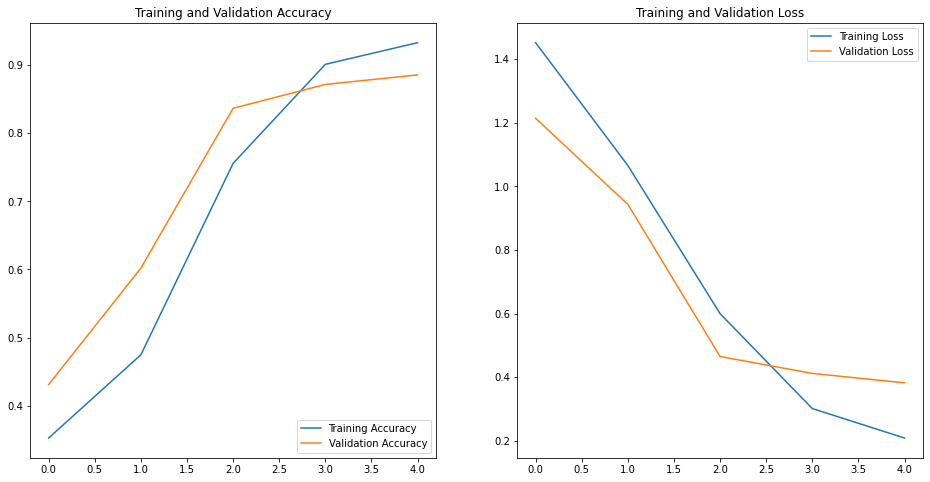

In [17]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(num_epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

테스트 모델에는 어떤 결과를 보이는지 확인해보겠습니다.

In [18]:
_, test_accuracy = rnn_model.evaluate(X_test, y_test)
print(f"테스트 정확도: {test_accuracy * 100:.3f}%")

63/63 [==============================] - 1s 14ms/step - loss: 0.3580 - accuracy: 0.8860
테스트 정확도: 88.600%


테스트 정확도도 꽤 괜찮은 것으로 나오는데, 그러면 실제 문장 및 클래스와 예측한 클래스를 몇개 샘플로 확인해보겠습니다.

In [19]:
y_pred_test = np.argmax(rnn_model.predict(X_test), axis=-1)
reverse_emotion_id = {
    0: 'anger',
    1: 'fear',
    2: 'joy',
    3: 'love',
    4: 'sadness',
    5: 'surprise',
}

for i in range(5):
    print(f"실제 문장: {test_texts[i]}")
    print(
        f"실제 클래스: {reverse_emotion_id[y_test[i]]}, "
        f"예측 클래스: {reverse_emotion_id[y_pred_test[i]]}"
    )
    print('=' * 50)

63/63 [==============================] - 1s 14ms/step
실제 문장: im feeling rather rotten so im not very ambitious right now
실제 클래스: sadness, 예측 클래스: sadness
실제 문장: im updating my blog because i feel shitty
실제 클래스: sadness, 예측 클래스: sadness
실제 문장: i never make her separate from me because i don t ever want her to feel like i m ashamed with her
실제 클래스: sadness, 예측 클래스: sadness
실제 문장: i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived
실제 클래스: joy, 예측 클래스: joy
실제 문장: i was feeling a little vain when i did this one
실제 클래스: sadness, 예측 클래스: sadness


## 5. Transformer 모델 학습

**Transformer**는 2017년에 발표된 논문 [Attention Is All You Need](https://arxiv.org/abs/1706.03762)에서 처음 소개된 논문으로, 자연어 처리 모델은 Transformer 이전과 이후로 나눌 수 있을 정도로 큰 파급력을 가져왔습니다. 이 모델은 2020년대 현재에는 BERT와 GPT 같은 거대 언어 모델의 핵심 구조로 절찬리에 사용되고 있습니다.

<center><img src="img/transformer.png" height=500></center>

Transformer는 입력과 출력값의 관점에서만 보면 RNN 기반 모델들과 크게 다르지 않을 수 있지만, 내부 동작에는 아주 큰 차이가 있습니다.

Transformer의 가장 대표적인 장치라고 하면 Self Attention을 활용한 **Multi-Head Attention**이 있습니다. 간단하게 설명하면 앞선 RNN이 현재 시점 데이터를 기준으로 인접한 데이터와의 패턴을 찾는 것에 중점을 두었다면, Self Attention은 한 sequence 내에 있는 모든 시점의 데이터간의 관계를 찾는 장치라고 할 수 있습니다.

그래서 Transformer는 한 sequence의 모든 시점 데이터가 한번에 들어가고, 각 단어 간의 연관 정보인 Attention Score를 계산하는 방식으로 출력값을 계산하게 됩니다. 아래 그림은 `time flies like an arrow`라는 문장에 Self Attention을 적용했을 때, 좌측 time과의 연관 점수를 우측에 시각화한 것입니다. 색이 진할수록 점수가 높은 것입니다.

<center><img src="img/self_attention.png"></center>

Transformer는 본래 번역 작업을 위해 나온 모델이었어서 위의 그림을 보면 좌측, 우측으로 모델 구조가 나눠진 것을 확인할 수 있습니다. 좌측이 인코더에 해당하는 부분이고 우측이 디코더인데, 이번 프로젝트에서는 분류 모델로 사용할 것이므로 좌측의 인코더 구조만 사용할 것입니다.

Transformer는 개요도만으로도 알 수 있듯이 그 구조가 꽤 복잡한 편입니다. 따라서 아래 간단한 Transformer 인코더 코드를 제공하지만, 자세한 설명은 생략하겠습니다. 이를 모두 설명하려면 본 프로젝트 자료 길이만큼의 새로운 자료가 필요할 수 있습니다. 각 class의 간단한 설명은 주석으로 남겨놓겠습니다.

In [20]:
# 아래 코드는 Tensorflow 공식 문서를 참고하여 일부를 수정한 코드입니다.
# https://www.tensorflow.org/text/tutorials/transformer


# Transformer는 self attention에서 모든 위치의 단어가 한번에 입력으로 들어갑니다.
# 이 때 각 단어의 위치 정보를 함께 나타내기 위해 Positional Embedding이라는 장치를 통해
# 각 단어를 새롭게 임베딩 합니다.
class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, vocab_size, d_model, input_length):
        super().__init__()
        self.d_model = d_model
        self.embedding = tf.keras.layers.Embedding(vocab_size, d_model, mask_zero=True) 
        self.pos_encoding = self.positional_encoding(length=input_length, depth=d_model)

    def positional_encoding(self, length, depth):
        depth = depth / 2

        positions = np.arange(length)[:, np.newaxis]       # (seq, 1)
        depths = np.arange(depth)[np.newaxis, :] / depth   # (1, depth)

        angle_rates = 1 / (10000 ** depths)       # (1, depth)
        angle_rads = positions * angle_rates      # (pos, depth)

        pos_encoding = np.concatenate(
            [np.sin(angle_rads), np.cos(angle_rads)],
            axis=-1
        )

        return tf.cast(pos_encoding, dtype=tf.float32)

    def compute_mask(self, *args, **kwargs):
        return self.embedding.compute_mask(*args, **kwargs)

    def call(self, x):
        length = tf.shape(x)[1]
        x = self.embedding(x)

        # This factor sets the relative scale of the embedding and positonal_encoding.
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x = x + self.pos_encoding[tf.newaxis, :length, :]

        return x


# 하나의 Transformer 인코더는 여러개의 인코더 Layer가 일렬로 연결된 구조입니다.
# 이 클래스는 그 하나의 Layer를 의미합니다.
# 여기서 Transformer의 핵심인 Muti Head Attention이 계산됩니다.
class TransformerEncoderLayer(tf.keras.Model):
    def __init__(
        self,
        d_model,
        num_heads,
        d_ff,
        dropout_rate
    ):
        super(TransformerEncoderLayer, self).__init__()

        # Attention
        self.mha = tf.keras.layers.MultiHeadAttention(
            key_dim=d_model,
            num_heads=num_heads,
            dropout=dropout_rate
        )
        self.layer_norm = tf.keras.layers.LayerNormalization()
        self.dropout = tf.keras.layers.Dropout(dropout_rate)

        # Feed-Forward
        self.ff = tf.keras.Sequential([
            tf.keras.layers.Dense(d_ff, activation='relu'),
            tf.keras.layers.Dense(d_model),
            tf.keras.layers.Dropout(dropout_rate)
        ])
        self.ff_norm = tf.keras.layers.LayerNormalization()

    def call(self, x):
        # Attention
        attn_out = self.mha(x, x)
        attn_out = self.dropout(attn_out)
        out = x + attn_out
        out = self.layer_norm(out)

        # Feed-Forward
        ff_out = self.ff(out)
        out = out + ff_out
        out = self.ff_norm(out)

        return out


# Transformer 인코더 layer를 복수로 쌓을 수 있게 만든 모델 클래스입니다.
# 이 모델에 Positional Embedding과 Classifier를 함께 추가하여 분류 모델로 사용합니다.
class TransformerEncoder(tf.keras.Model):
    def __init__(
        self,
        num_layers,
        d_model,
        num_heads,
        d_ff,
        vocab_size,
        num_classes,
        input_length,
        dropout_rate=0.0,
    ):
        super(TransformerEncoder, self).__init__()

        # Embedding
        self.pos_embedding = PositionalEmbedding(vocab_size, d_model, input_length)
        self.dropout = tf.keras.layers.Dropout(dropout_rate)

        # Encoder Layers
        self.enc_layers = [
            TransformerEncoderLayer(
                d_model=d_model,
                num_heads=num_heads,
                d_ff=d_ff,
                dropout_rate=dropout_rate
            )
            for _ in range(num_layers)
        ]

        # Classifier
        self.classifier = tf.keras.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_classes, activation='softmax')
        ])

    def call(self, x):
        # Embedding
        out = self.pos_embedding(x)
        out = self.dropout(out)

        # Encoder Layer
        for enc_layer in self.enc_layers:
            out = enc_layer(out)

        # Classifier
        out = self.classifier(out)

        return out

이제 아래에서 Transformer 인코더 모델을 만들어서 학습해보겠습니다.

In [21]:
transformer_model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,), dtype=tf.string),
    tokenizer_layer,
    TransformerEncoder(
        num_layers=2, # 인코더 layer는 두개 사용
        d_model=embedding_dim, # 임베딩된 단어 벡터의 차원
        num_heads=4, # Multi Head Attention에서 head의 개수
        d_ff=256, # Feed-Forward layer에서 사용할 차원 수
        vocab_size=tokenizer_layer.vocabulary_size(), # Tokenizer가 찾은 전체 토큰 개수
        num_classes=num_classes, # 클래스 개수
        input_length=max_sequence_length, # 입력 문장의 최대 토큰 수. 앞서 50개로 지정했었습니다.
        dropout_rate=0.05
    )
])

# 모델을 구성하는 layer들의 요약 정보를 확인합니다.
transformer_model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
num_epochs = 5
transformer_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = transformer_model.fit(
    X_train,
    y_train,
    epochs=num_epochs,
    batch_size=64,
    shuffle=True,
    validation_data=(X_valid, y_valid)
)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 30)               0         
 ectorization)                                                   
                                                                 
 transformer_encoder (Transf  (None, 6)                875206    
 ormerEncoder)                                                   
                                                                 
Total params: 875,206
Trainable params: 875,206
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
250/250 [==============================] - 25s 93ms/step - loss: 1.2919 - accuracy: 0.5047 - val_loss: 0.4037 - val_accuracy: 0.8595
Epoch 2/5
250/250 [==============================] - 23s 90ms/step - loss: 0.3028 - accuracy: 0.8859 - val_loss: 0.3375 - val_accuracy: 0.8740
Epoch 3/5
250/250 [=======

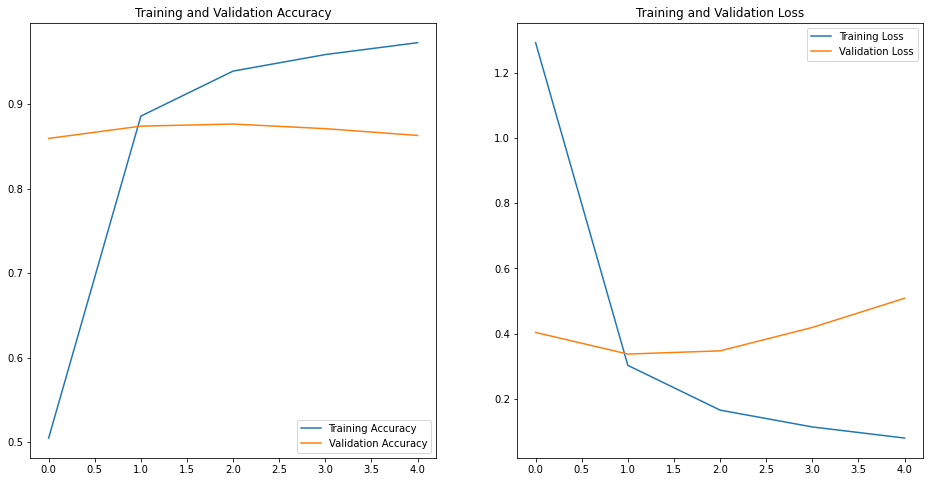

In [22]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(num_epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

마찬가지로 테스트 모델에는 어떤 결과를 보이는지 확인해보겠습니다.

In [23]:
_, test_accuracy = transformer_model.evaluate(X_test, y_test)
print(f"테스트 정확도: {test_accuracy * 100:.3f}%")

63/63 [==============================] - 1s 15ms/step - loss: 0.5712 - accuracy: 0.8470
테스트 정확도: 84.700%


LSTM으로 만든 모델하고 큰 차이 없는 모습을 확인할 수 있습니다. 데이터 수가 많이 적은 편이라 Transformer가 유의미한 성능 격차를 보이지는 못하고 있습니다.

실제로 수억개 이상의 텍스트 데이터를 처리할 때는 Transformer가 압도적인 격차로 좋은 성능을 보일 것입니다.

In [24]:
y_pred_test = np.argmax(transformer_model.predict(X_test), axis=-1)
reverse_emotion_id = {
    0: 'anger',
    1: 'fear',
    2: 'joy',
    3: 'love',
    4: 'sadness',
    5: 'surprise',
}

for i in range(5):
    print(f"실제 문장: {test_texts[i]}")
    print(
        f"실제 클래스: {reverse_emotion_id[y_test[i]]}, "
        f"예측 클래스: {reverse_emotion_id[y_pred_test[i]]}"
    )
    print('=' * 50)

63/63 [==============================] - 1s 15ms/step
실제 문장: im feeling rather rotten so im not very ambitious right now
실제 클래스: sadness, 예측 클래스: sadness
실제 문장: im updating my blog because i feel shitty
실제 클래스: sadness, 예측 클래스: sadness
실제 문장: i never make her separate from me because i don t ever want her to feel like i m ashamed with her
실제 클래스: sadness, 예측 클래스: sadness
실제 문장: i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived
실제 클래스: joy, 예측 클래스: joy
실제 문장: i was feeling a little vain when i did this one
실제 클래스: sadness, 예측 클래스: sadness


## 제출

제출을 위해서 프로젝트에서 배운 전처리 기법과 모델을 자유롭게 활용하여 `submission_test.csv`에 저장된 문장들의 감정을 분류할 것입니다.

아래의 형태로 예측값을 만들어 CSV 파일로 제출합니다. 제출 라벨이 정수형이 아니라 원래 감정 라벨인 점에 유의하세요. 제출 파일 이름은 `submission.csv` 여야 합니다.

| index | emotion |
|-------|---------|
| 0     | joy     |
| 1     | sadness |
| 2     | anger   |
| 3     | love    |
| 4     | fear    |

통과 기준은 **정확도 95% 이상**입니다.

In [25]:
submission_df = pd.read_csv('./submission_test.csv')
submission_df

,sentence
0,i feel im being punished for not being able to...
1,i love getting out the decorations and feeling...
2,i could feel he divine blessing on me for the ...
3,i still can t get over the fact that i feel ab...
4,i feel a little strange recommending this one ...
...,...
4995,i justified in feeling slighted or am i just b...
4996,i started to feel some dull cramps that lasted...
4997,i feel shy about it all and also a little conc...
4998,i am not a professional historian by any means...


### 채점

결과 csv 파일을 저장 후, 아래 코드를 실행하면 채점을 받을 수 있습니다.

**아래 코드를 수정하면 채점이 불가능 합니다.**

In [26]:
# 채점을 수행하기 위하여 로그인
import sys
sys.path.append('vendor')
from elice_challenge import check_score, upload

In [ ]:
# 제출 파일 업로드
await upload()

In [ ]:
# 채점 수행
await check_score()

---

<span style="color:rgb(120, 120, 120)">본 학습 자료를 포함한 사이트 내 모든 자료의 저작권은 엘리스에 있으며 외부로의 무단 복제, 배포 및 전송을 불허합니다.

Copyright @ elice all rights reserved</span>